# L3-SID INTRODUCTION AU MACHINE LEARNING
## TP 3 + projet: Apprentissage via scikit-learn

## Objectifs du TP
Le travail sera commencé en séance puis terminé sous forme de projet qui
devra être rendu dans un notebook python pour l’ensemble du TP. Il devra s’agir d’un travail PERSONNEL. Vous noterez vos réponses ainsi que vos commentaires, vos choix, vos figures et vos discussions sur les
résultats directement dans le notebook. Le devoir devra être déposé sur moodle avant le (date à preciser par l'enseignant). 
Dans ce TP, on utilisera la base `titanic`.

## Chargement de la base et sélection des données

* Téléchargez la base *titanic.csv* et chargez-la dans un DataFrame (pandas), noté *df* (pandas).
* Affichez les attributs de la base et leur nombre. De quel type sont-ils (réels, nominaux ou variables binaires,...) ? Combien y a-t-il de classes ?
*  Vous devez maintenant nettoyer la base :
    * Retirer les colonnes qui vous semblent inutiles pour l'apprentissage à l'aide de *df.drop(index)*
    * Certaines variables sont nominatives et scikit learn ne traite que des variables numériques. Transformer les variables numériques en variables binaires à de *pandas.get\_dummies*
    * remplacer les valeurs nan par la moyenne à l'aide de *df.fillna*
* Afin de créer une base d'apprentissage et une base de test, créez une fonction *split(df,p)* qui séparera et retournera deux DataFrames, notés *train* et *test* dont la taille est déterminée par un pourcentage *p* passé en paramètre (60/40%, 70/30%,...). Appliquez la fonction à *df*.

#Import Libraries :

In [275]:
import numpy as np # linear algebra
from numpy import mean
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Pour les graphs
import matplotlib.pyplot as plt
import random #Viz Seaborn Graphics
from sklearn.preprocessing import StandardScaler #For Scaling Data 

from math import log2 #Entropi

#Load the Data : 💻

In [276]:
df = pd.read_csv("/content/titanic.csv") #Importation des données
df.shape # n=891 & d=12

(891, 12)

In [277]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Feautures : ✅

*Notre jeu de données contient 12 variables et 891 individus .*

---

# *Quantitative* :  
*   ***Continues*** : 
1.  Fare : Tarif passager

---


*   ***Discrets*** : *Elles ne peuvent prendre que des valeurs numériques entières.*
1.   Age : l'age en années.
2.   Sibsp : Nombre des frères et sœurs / conjoints au bord du Titanic.
3.   Parch :  Nombre des parnets / enfants au bord du Titanic.



---

# *Qualitative* : 
*   ***Binaires*** : *Elles ne possèdent que deux modalités (deux classes) possibles.*
1.   Survived : 0 = Non, 1 = Oui
2.   Sex : Male or Female

---

*   ***Odinales*** : *Il existe un gradient qui permet de les classer dans un ordre logique.*
1.   Pclass : Variabel Ordinale à 3 Classes.

---

*   ***Nominales*** : 
1.   Embarked : à 3 classes (Port d'Embarquation, C = Cherbourg, Q = Queenstown, S = Southampton) 

---
*   PassengerID : Corresponds à l'identifiant de passager --> Varible inutile.
*   Name : Variable de type string.
*  Ticket : Variable de type string (Numero du Ticket).
* Cabin : Variable de type string (Numero du cabin).


🛑 On servira pas de L'identifiant de passager : **PassengerId**, son nom **Name** et son **Ticket**, **Cabin**.

#Data Preprocessing : 🔁

In [278]:
df.info() #Age and Embarked have some missing values to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
# Cette fonction afficher le pourcentage des valeures manquantes par chaque colonne :
def percent_missing_values(df) :
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df.percent_missing.sort_values( ascending = False)

In [280]:
print("Les valeurs manquantes : \n",percent_missing_values(df))

Les valeurs manquantes : 
 Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Name: percent_missing, dtype: float64


<Figure size 1296x1152 with 0 Axes>

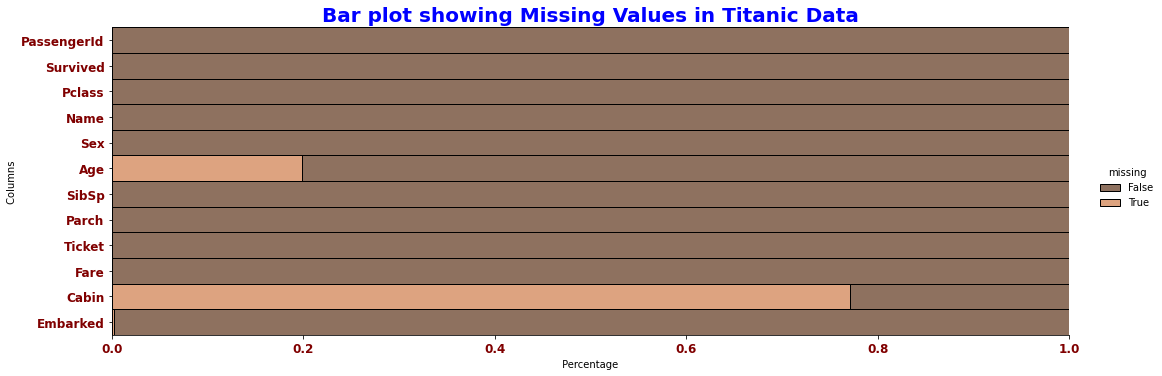

In [281]:
#Bar Plot montrant le pourcentage des valeurs manquants sur les données du Titanic : Age/Cabin
plt.figure(figsize=(18,16))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Missing Values in Titanic Data', weight = 'bold', size = 20, color = 'blue')
plt.xlabel(" Percentage ")
plt.ylabel(" Columns ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

⭕ *On a 77% des valeurs manquantes de la variable **Cabin** -----> On **supprimera** cette variable.*

⭕ *Pour la variables **Age** (resp **Embarked**)  -----> on essaiera de les remplacer par **Median** (resp **Mode**) .*

#Par Quoi on remplace les Nans : Mean or Mode ?

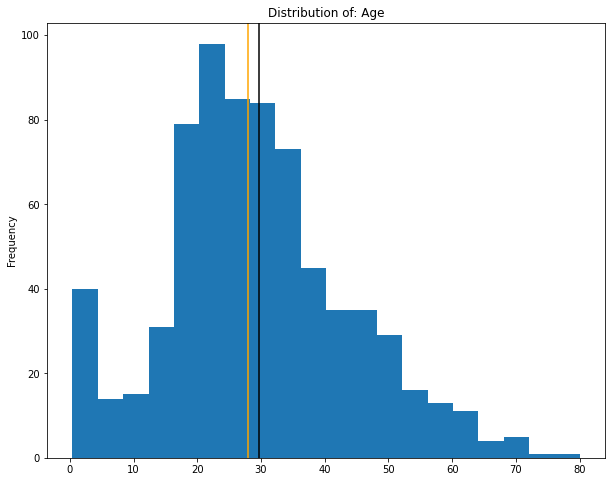

In [282]:
#Pour avoir une idée laquelle sure mieux à remplacer par :  Mean or Median
mean_list = ['Age']
plt.figure(figsize= (10,8))
for i, col in enumerate(mean_list)  : 
    plt.subplot(1,1,i+1)
    df[col].plot(kind='hist', bins=20,title = f'Distribution of: {col}')
    plt.axvline(df[col].mean(), color='black')   # Black  == Mean
    plt.axvline(df[col].median(),color='orange') # Orange == Median

In [283]:
medianAgeTrain = df['Age'].median()   
modeEmbarkedTrain = df["Embarked"].mode()[0]

def cleanData(data):  
    clean_data = data.copy(deep=True)
    clean_data = clean_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1) 

    # Missing Values : Age
    clean_data['Age'].fillna(medianAgeTrain, inplace=True)
    
    # Missing Values : Embarked
    clean_data["Embarked"].fillna(modeEmbarkedTrain, inplace=True)
        
    # Onehotencding for Sex & Embarked attributes : Transformation en valeurs numériques
    clean_data = pd.get_dummies(clean_data, columns=['Sex','Embarked'], drop_first=True)
    
    return clean_data

In [284]:
clean_data = cleanData(df)

In [285]:
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#***Split Data :***

In [286]:
#p : est le pourcentage à donner pour les données d'entrainement (Train_data)
def split(df,p) : 
  train_data = df.sample(frac=p, random_state=42)
  test_data = df.drop(train_data.index)
  return train_data , test_data

train_data , test_data = split(clean_data,0.8)  #J'ai fait le choix de 80/20, içi on divise notre jeu de données qu'on vient de nettoyer.

#Satatistics Desc : ✅

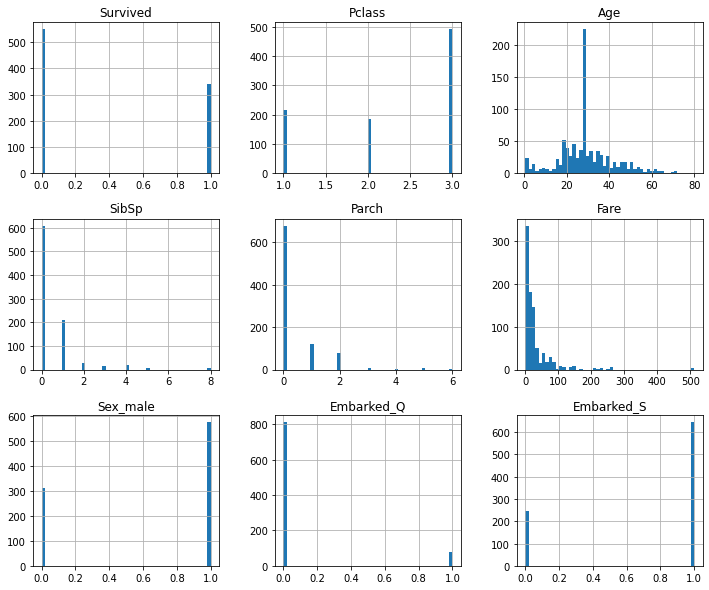

In [287]:
clean_data.hist(bins=50, figsize=(12,10)) 
plt.show()

# Distribution des Variables :

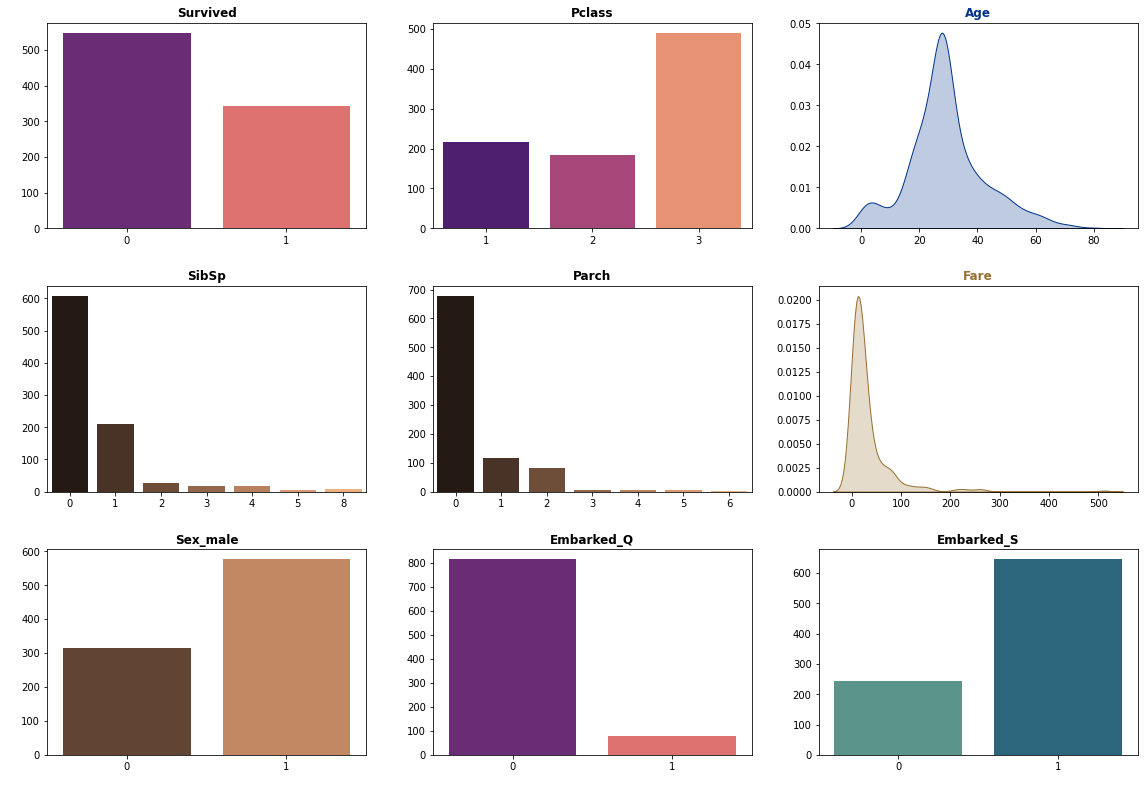

In [288]:
useful_cols = [col for col in clean_data.columns if col not in ['Cabin']]
cols_dist = [col for col in useful_cols if col not in ['Survived','Pclass','Sex_male','SibSp','Parch','Embarked_Q','Embarked_S']]
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['magma', 'copper', 'crest']


plt.figure(figsize= (16,18))
for i,col in enumerate(clean_data[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,3, i+1)
    if col in cols_dist:
        
        sns.kdeplot(clean_data[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = clean_data , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
# plt.subplot(5,3, 14)
# sns.kdeplot(np.log(df['instrumentalness']), color = rand_col, fill = rand_col )
# plt.title('instrumentalness (log transformed)',weight = 'bold', color = rand_col, size = 17)
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()
plt.show();

# Visualisation : ✅

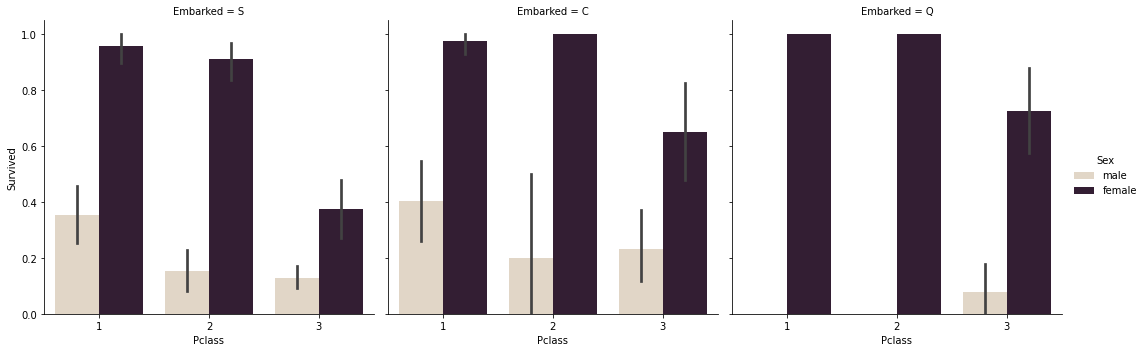

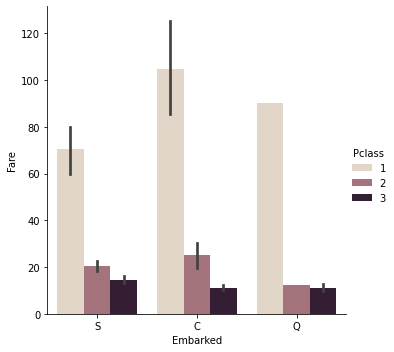

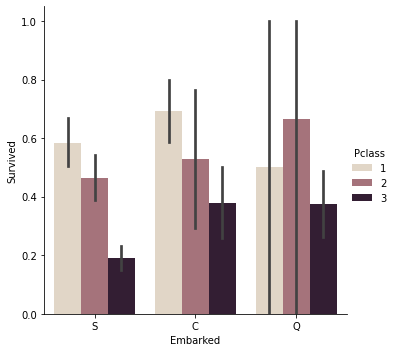

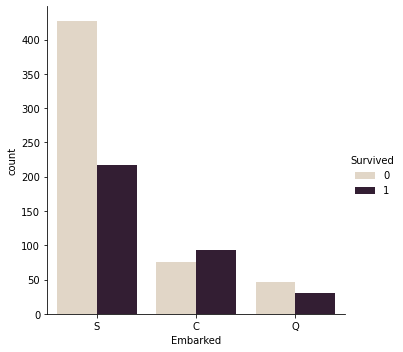

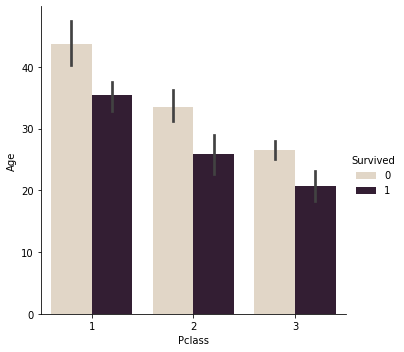

In [289]:
#Visualisation avec Seaborn : 
sns.catplot(x="Pclass" ,y = 'Survived',hue="Sex", kind="bar" ,col = 'Embarked', palette="ch:.25", data=df)
# On regarde que les femmes ont une pourcentage d'etre survvi plus que les hommes
sns.catplot(x="Embarked", y="Fare", hue="Pclass", kind="bar", palette="ch:.25", data=df)
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", palette="ch:.25", data=df)
sns.catplot(x="Embarked", hue="Survived", kind="count", palette="ch:.25", data=df)
sns.catplot(x="Pclass", y="Age",hue = "Survived", kind="bar", palette="ch:.25", data=df)
plt.show()

#Scaling : Optionnel 

In [290]:
def featureScaling(data):
    scaledData = data.copy().drop("Survived", axis=1)   
    scaler = StandardScaler()
    scaler.fit(clean_train.drop("Survived", axis=1)[:].values)
    scaledData = pd.DataFrame(scaler.transform(scaledData), columns=scaledData.columns)
    return scaledData

In [291]:
# scaled_train , scaled_test = featureScaling(train_data), featureScaling(test_data)

# Entropie
Le but ici est de caculer l'entropie et de gain d'entropie comme pour la construction d'un arbre de décision.
* Ecrire une fonction entropie qui prend une liste (ou un array numpy) de valeur binaires et qui calcule l'entropie. Appliquer cette fonction sur la classe.
* Ecrire une fonction gain d'entropie qui prend une liste pour la classe (en binaire) et une liste pour les valeurs correspondantes d'un autre attribut (binaire aussi) 
* Calculer le gain d'entropie pour l'attribut pour le sexe et toutes les autres variables binaires que vous avez crées. Quelle serait le meilleur attribut pour démarrer un arbre de décision ?

In [292]:
def ndarray_to_tuple(ndarray) :         #Cette fonction prends les valeurs binaire d'une variable et renvoie une tuple comptant l'appartition de chaque élément.
  unique, counts = np.unique(ndarray, return_counts=True)
  d = dict(zip(unique, counts))
  t =()
  for i in list(d.keys()) : 
    t += (d[i],)
  return t

def entropie(s):                            #   Entré : Feature (Ex : df.Survived)
  feature_values = s.values                 #   Acceder aux valeurs de notre variable (Ex : df.Survuved.values)
  t = ndarray_to_tuple(feature_values)      #   Avoir le tuple qui permettre calculer les proportions  (Ex : t = (436,277))
  if t[0]!=0 and t[1]!=0:
    prop1 = t[0]/sum(t)
    prop2 = t[1]/sum(t)
    ent =  -prop1*(log2(prop1))-prop2*(log2(prop2))
  else:
    ent = 0
  return ent

**⚡** ***Entropie de la classe Survived = 0.96*** :

In [293]:
entropie(clean_data.Survived)

0.9607079018756469

#***Gain*** : 

In [294]:
def Entropie(s):   #Cette fonction calcule l'entrope des tuples qui sont déja pretes
    if s[0]!=0 and s[1]!=0:
        prop1 = s[0]/sum(s)
        prop2 = s[1]/sum(s)
        ent =  -prop1*(log2(prop1))-prop2*(log2(prop2))
    else:
        ent = 0
    return ent


def gain(s,sv):
  feature_values = s.values                 #   Acceder aux valeurs de notre variable (Ex : df.Survuved.values)
  t = ndarray_to_tuple(feature_values)
  Sv = []

  for i in range(len(pd.unique(sv))) : 
    l = pd.unique(sv)
    x = clean_data.loc[sv == l[i] ].Survived
    feature_values = x.values 
    t1 = ndarray_to_tuple(feature_values)
    Sv.append(t1)

  g = entropie(s) 
  for sub in Sv:
    if len(sub) == 2 : 
      w = (sub[0]+sub[1])/sum(t)
      g = g - w*Entropie(sub)
  return g

In [295]:
print("Gain de l'attribut Sex : ", gain( s=clean_data.Survived ,  sv=clean_data.Sex_male	)) #, entropie(clean_data.Survived)
print("Gain de l'attribut Pclass : " , gain( s=clean_data.Survived ,  sv=clean_data.Pclass	))
print("Gain de l'attribut SibSp : " , gain( s=clean_data.Survived ,  sv=clean_data.SibSp	))
print("Gain de l'attribut Parch : " , gain( s=clean_data.Survived ,  sv=clean_data.Parch	))
print("Gain de l'attribut Embarked_Q : " , gain( s=clean_data.Survived ,  sv=clean_data.Embarked_Q	))
print("Gain de l'attribut Embarked_S : " , gain( s=clean_data.Survived ,  sv=clean_data.Embarked_S	))

Gain de l'attribut Sex :  0.21766010666061425
Gain de l'attribut Pclass :  0.08383104529601162
Gain de l'attribut SibSp :  0.0334663213387099
Gain de l'attribut Parch :  0.023610547633470844
Gain de l'attribut Embarked_Q :  9.595971248679835e-06
Gain de l'attribut Embarked_S :  0.015909401384176347


## Familiarisation avec quelques méthodes du package *scikit-learn*+
On utilisera les fonctions d'apprentissage bayésien naïf de *scikit-learn* pour prédire la classe de la base *test* créée précédemment lorsque le modèle prédictif est calculé à partir de la base d'apprentissage *train*. Pour cela, vous aurez besoin des fonctions:

In [296]:
X_train = train_data.loc[:, train_data.columns != 'Survived'].values
y_train = train_data.Survived.values

X_test = test_data.loc[:, test_data.columns != 'Survived'].values
y_test = test_data.Survived.values

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((713, 8), (713,), (178, 8), (178,))

In [297]:
from sklearn.naive_bayes import GaussianNB
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)
pred_gaussian = clf_gaussian.predict(X_test)  

In [298]:
def prediction(labels,pred) : 
  taux = (pred == labels)
  unique, counts = np.unique(taux, return_counts=True)
  d = dict(zip(unique, counts))
  return d[True]/len(labels)

In [299]:
prediction(y_test,pred_gaussian) #Taux de prédiction pour l'algorithme Naive_Byaes

0.7584269662921348

S'aider de l'aide en ligne (http://scikit-learn.org) pour l'utilisation de la méthode.
* Quels sont les paramètres de réglage de la méthode ?
* Créez une fonction *prediction(labels,pred)* qui renverra le taux de prédiction (en %) pour une prédiction stockée dans *pred* et les valeurs souhaitées stockées dans *labels*. On calculera le taux de prédiction de l'apprentissage bayésien naïf sur la base *test*.
* Répétez les questions précédentes avec la méthode des arbres de décision. Pour cela vous aurez besoin des fonctions:

In [300]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
pred_tree = clf_tree.predict(X_test) 

In [301]:
prediction(y_test,pred_tree) 

0.7865168539325843

* Mêmes questions ensuite avec la méthode des *k* plus proches voisins et la regression logistique. Voir l'aide en ligne pour un descriptif de l'utilisation des méthodes. A chaque fois, précisez bien quels sont les paramètres de la méthode.


#***K plus proches voisins*** : 

In [302]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)

In [303]:
prediction(y_test,pred_knn)

0.702247191011236

# Logostic Regression :

In [304]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [305]:
prediction(y_test,pred_lr)

0.7808988764044944

# Recherche des paramètres optimaux

> Bloc en retrait


Pour chacune des méthodes, utilisez la fonction *split* pour séparer la base en deux DataFrames de taille équivalente (*train* et *test*). Recherchez ensuite les paramètres optimaux qui vous donneront le meilleur taux de prédiction sur *test* lorsque le modèle apprend les données de *train*. Pour cela, utilisez une grille de valeurs pour les paramètres et pour chaque valeur de la grille, calculez le taux de prédiction sur *test* lorsque vous apprenez *train*. Retenez les valeurs de paramètres donnant le meilleur taux. Les bornes de valeurs et le pas de la grille sont à déterminer de façon empirique.

In [306]:
!pip install pipelinehelper #Pour créer des Pipeline 
from pipelinehelper import PipelineHelper
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [307]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler())
    ])),

    ('classifier', PipelineHelper([
          ('g',GaussianNB()),
         ('lg',LogisticRegression()),
         ('dt' , tree.DecisionTreeClassifier()),
         ('knn', KNeighborsClassifier())
         
       
        
       
        
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True,]
#         
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        
        'g__priors': [None],
        'g__var_smoothing': [0.00000001, 0.000000001, 0.00000001],

        'lg__class_weight' :['balanced' ], 
         'lg__penalty' :['l1', 'l2', 'elasticnet'],
         'lg__solver' : ['liblinear', 'saga','lbfgs'],
          'lg__C' : [ 100 ,10, 1.0],

          'dt__max_depth': [2, 3, 5, 10, 20],
         'dt__min_samples_leaf': [5, 10, 20, 50, 100],
        'dt__criterion': ["gini", "entropy"],

        'knn__n_neighbors' : [5,7,9,11,13,15],
        'knn__weights' : ['uniform','distance'],
        'knn__metric' : ['minkowski','euclidean','manhattan']
        
   })
}

grid = GridSearchCV(pipe, params, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/pipelinehelper/__init__.py", line 159, in fit
    return self.selected_model.fit(x, y, **kwargs)
  File "/usr/local/lib/pyt

GridSearchCV(estimator=Pipeline(steps=[('scaler',
                                        PipelineHelper(available_models={'std': StandardScaler()})),
                                       ('classifier',
                                        PipelineHelper(available_models={'dt': DecisionTreeClassifier(),
                                                                         'g': GaussianNB(),
                                                                         'knn': KNeighborsClassifier(),
                                                                         'lg': LogisticRegression()}))]),
             param_grid={'classifier__selected_model': [('g',
                                                         {'priors': None,
                                                          'var_smoothing': 1e-08}),
                                                        ('...
                                                          'solver': 'lbfgs'}),
                           

In [308]:
print("Meilleure score : %f using %s" % (grid.best_score_, grid.best_params_))

Meilleure score : 0.856053 using {'classifier__selected_model': ('knn', {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}), 'scaler__selected_model': ('std', {'with_mean': True})}


#Best Parametres :

In [309]:
clf_gaussian_best_param = GaussianNB(priors = None, var_smoothing=  1e-08)
clf_tree_best_param = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf= 20)
clf_knn_best_param =  KNeighborsClassifier(metric = 'manhattan', n_neighbors= 13, weights= 'uniform')
clf_lr_best_param = LogisticRegression(C= 1.0, class_weight='balanced', penalty= 'l1', solver= 'liblinear')

# **Print The best score for each model** : 

In [310]:
cv_results = pd.DataFrame.from_dict(grid.cv_results_)
df_hyperparameter = cv_results[['params', 'mean_score_time', 'std_score_time', 'mean_test_score']]  #RAJOUTER LES AUTRES SCORES POSSIBLES !!

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('expand_frame_repr', False)
d = df_hyperparameter.dropna().sort_values('mean_test_score',ascending = False)
d['modele'] = [ i['classifier__selected_model'][0] for i in d['params']]
d.drop_duplicates('modele',keep='first')

,params,mean_score_time,std_score_time,mean_test_score,modele
112,"{'classifier__selected_model': ('knn', {'metri...",0.005792,0.000087,0.856053,knn
40,"{'classifier__selected_model': ('dt', {'criter...",0.001470,0.000102,0.850137,dt
21,"{'classifier__selected_model': ('lg', {'C': 1....",0.002274,0.000570,0.847857,lg
0,"{'classifier__selected_model': ('g', {'priors'...",0.001899,0.000281,0.825956,g


## Comparaison des méthodes par validation croisée
Pour chacune des méthodes et en utilisant les paramètres optimaux déterminés précédemment, réalisez une procédure de validation croisée pour calculer le taux de prédiction moyen et sa variance lorsque le nombre de folds est 5. Pour cela, vous aurez besoin de la fonction suivante :

In [311]:
from sklearn.model_selection import cross_val_score
scores_gaussian = cross_val_score(clf_gaussian_best_param, X_train, y_train, cv=5)
scores_tree = cross_val_score(clf_tree_best_param, X_train, y_train, cv=5)
scores_knn = cross_val_score(clf_knn_best_param, X_train, y_train, cv=5)
scores_lr = cross_val_score(clf_lr_best_param , X_train, y_train, cv=5)

# clf_gaussian_best_param = GaussianNB(priors = None, var_smoothing=  1e-08)
# clf_tree_best_param = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf= 20)
# clf_knn_best_param =  KNeighborsClassifier(metric = 'manhattan', n_neighbors= 13, weights= 'uniform')
# clf_lr_best_param = LogisticRegression(C= 1.0, class_weight='balanced', penalty= 'l1', solver= 'liblinear')

Elle vous donnera les taux de prédiction pour chacun des folds de tests (voir procédure de validation croisée et l'aide en ligne http://scikit-learn.org).

## Affichage des résultats
On souhaite présenter graphiquement le résultat de la validation croisée ainsi que la comparaison des performances des méthodes. Pour cela on utilisera l'environnement *pyplot* de *matplotlib* :
* Pour chacune des 4 méthodes utilisées, affichez un *subplot* qui représentera un diagramme en barres des 5 taux de prédiction correspondants à chacun des folds de la validation croisée (vous pouvez utiliser les paramètres optimaux trouvés précédemment pour cela). Les 4 subplots seront affichés de manière à obtenir 2 niveaux de 2 subplots. Pour cela, vous aurez besoin des 2 fonctions suivantes:

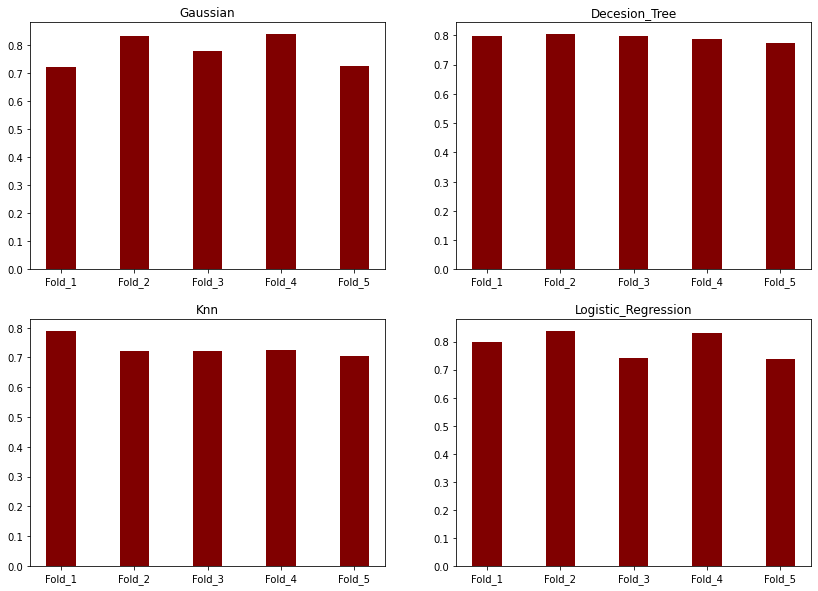

In [312]:
from matplotlib.pyplot import *

fig = plt.figure(figsize = (14, 10))
scores = [scores_gaussian , scores_tree , scores_knn, scores_lr]
Model = ["Gaussian" , "Decesion_Tree" , "Knn" ,  "Logistic_Regression"]
for i in range(len(scores)) : 
  plt.subplot(2,2, i+1)
  data = {'Fold_1':scores[i][0], 'Fold_2':scores[i][1] , 'Fold_3':scores[i][2] , 'Fold_4':scores[i][3] ,  'Fold_5':scores[i][4]}
  courses = list(data.keys())
  values = list(data.values())
  
 
  #  creating the bar plot
  plt.title(Model[i])
  plt.bar(courses, values, color ='maroon',width = 0.4)

* Affichez ensuite un diagramme de 4 barres correspondant aux 4 méthodes où chaque barre représente le taux moyen de prédiction issu de la validation croisée pour une méthode (toujours avec les paramètres optimaux). Comparez.

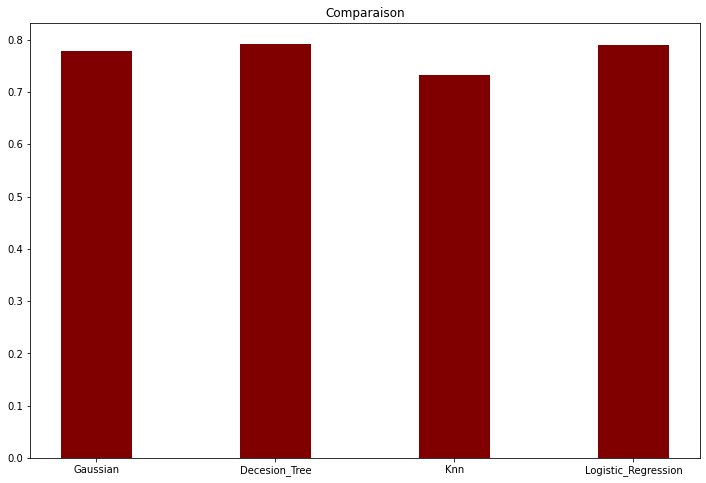

In [313]:
fig = plt.figure(figsize = (12, 8))
scores = [mean(scores_gaussian) , mean(scores_tree) , mean(scores_knn), mean(scores_lr)]
Model = ["Gaussian" , "Decesion_Tree" , "Knn" ,  "Logistic_Regression"]
for i in range(len(scores)) : 
  # plt.subplot(2,2, i+1)
  data = {Model[0] :scores[0], Model[1]:scores[1] , Model[2]:scores[2] , Model[3]:scores[3] }
  courses = list(data.keys())
  values = list(data.values())
  
 
  #  creating the bar plot
  plt.title('Comparaison')
  plt.bar(courses, values, color ='maroon',width = 0.4)

## Bonus
Vous êtes encouragés à :
* créer de nouveaux attributs à partir des attributs nominaux que vous n'aurez pas utilisés
* tester d'autres algorithme
* faire la fonction de calcul de gain pour un attribut numérique. Cette fonction renverra le seuil qui maximise le gain.

# Random Forest Always perform better then the others Models !

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

model_Survived = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=1)
model_Survived.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
# evaluate model
scores_RandomForest = cross_val_score(model_Survived, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores_RandomForest)) 

Mean ROC AUC: 0.860


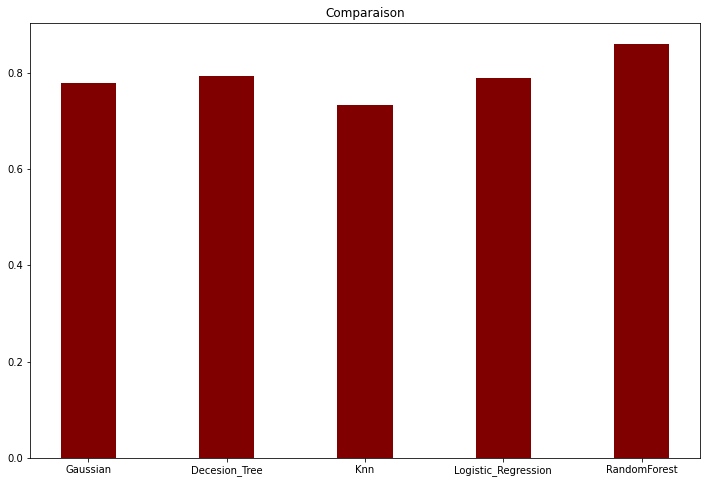

In [315]:
fig = plt.figure(figsize = (12, 8))
scores = [mean(scores_gaussian) , mean(scores_tree) , mean(scores_knn), mean(scores_lr),mean(scores_RandomForest)]
Model = ["Gaussian" , "Decesion_Tree" , "Knn" ,  "Logistic_Regression", 'RandomForest']
for i in range(len(scores)) : 
  # plt.subplot(2,2, i+1)
  data = {Model[0] :scores[0], Model[1]:scores[1] , Model[2]:scores[2] , Model[3]:scores[3], Model[4]:scores[4] }
  courses = list(data.keys())
  values = list(data.values())
  
 
  #  creating the bar plot
  plt.title('Comparaison')
  plt.bar(courses, values, color ='maroon',width = 0.4)

**Resultats** : Random Forest a des bonnes score par rapport aux autres modeles.

***Deep Learning*** : Deep Learning solve any problem but it's not necessary for this use case

In [316]:
import keras

In [317]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=8, units=11, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 11)                99        
                                                                 
 dense_40 (Dense)            (None, 11)                132       
                                                                 
 dropout_12 (Dropout)        (None, 11)                0         
                                                                 
 dense_41 (Dense)            (None, 11)                132       
                                                                 
 dropout_13 (Dropout)        (None, 11)                0         
                                                                 
 dense_42 (Dense)            (None, 5)                 60        
                                                                 
 dense_43 (Dense)            (None, 1)                

In [318]:
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.1,verbose = 1,shuffle=True )
# x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.sequential.Sequential instance
#     Trains the model for a fixed number of epochs (iterations on a dataset).

Epoch 1/100
65/65 [==============================] - 3s 12ms/step - loss: 0.6917 - accuracy: 0.5835 - val_loss: 0.6896 - val_accuracy: 0.6111
Epoch 2/100
65/65 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6115 - val_loss: 0.6865 - val_accuracy: 0.6111
Epoch 3/100
65/65 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.6209 - val_loss: 0.6799 - val_accuracy: 0.6389
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6661 - val_loss: 0.6698 - val_accuracy: 0.6667
Epoch 5/100
65/65 [==============================] - 0s 6ms/step - loss: 0.6672 - accuracy: 0.6459 - val_loss: 0.6671 - val_accuracy: 0.6528
Epoch 6/100
65/65 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6568 - val_loss: 0.6624 - val_accuracy: 0.6667
Epoch 7/100
65/65 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6630 - val_loss: 0.6634 - val_accuracy: 0.6667
Epoch 8/100


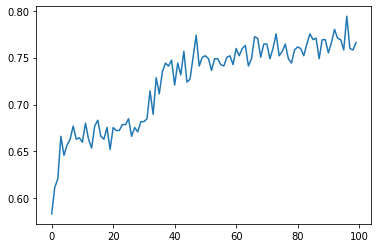

In [319]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()

In [320]:
deep_learning_pred = classifier.predict(X_test)
deep_learning_pred=deep_learning_pred.round()

In [321]:
def prediction_deeplearning(labels,pred) : 
  taux = (pred == labels)[1]
  unique, counts = np.unique(taux, return_counts=True)
  d = dict(zip(unique, counts))
  return d[True]/len(labels)

In [322]:
prediction_deeplearning(y_test , deep_learning_pred ) #Resultat assez bàs , faut encore ajouter des coches et des bonnes metrics/optimizers ....

0.6348314606741573